In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{bm}')

In [2]:
import os
import sys

script_path = os.path.dirname(os.path.abspath('__file__'))
sys.path.append(os.path.join(script_path))

# Real-wold pytorch

In [3]:
'''
Test

t1 = torch.tensor([[13,15],[12,17]])
t2 = torch.tensor([[10,16],[14,14],[11,13]])
t3 = torch.tensor([2,1])
print(t1)
print(t2)
print(t3)

'''

'\nTest\n\nt1 = torch.tensor([[13,15],[12,17]])\nt2 = torch.tensor([[10,16],[14,14],[11,13]])\nt3 = torch.tensor([2,1])\nprint(t1)\nprint(t2)\nprint(t3)\n\n'

In [4]:
import numpy as np
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms

In [5]:
print('GPU: ',torch.cuda.is_available())
dtype = torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

GPU:  True


In [6]:
# check if CUDA is available
train_on_gpu = torch.cuda.is_available()
if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


## English character omitted

In [7]:
import os
import sys

script_path = os.path.dirname(os.path.abspath('__file__'))
sys.path.append(os.path.join(script_path))

save_path = os.path.join(script_path,'out','EMNIST')

In [5]:
transform=transforms.Compose([transforms.ToTensor()])
train_dataset = dsets.EMNIST(root='./data',train=True, split='letters', transform=transform,download=True)#first time download should be load.
test_dataset = dsets.EMNIST(root='./data',train=False, split='letters', transform=transform,download=False)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=len(train_dataset))
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=len(test_dataset))

In [8]:
for a, b in train_loader:
  train_data = a
  train_label = b

In [9]:
chaO = train_data[train_label==15] #label for O is 15

In [6]:
load_path = os.path.join(script_path,'out','MNIST')
opt_0, ini_8 = torch.load(load_path+'/opt_0_ini_8.pt')

In [18]:
def mstsml(chaO, opt_0):
    '''
    search the most similar character O
    opt_0.shape: [1, 28, 28]
    chaO.shape: [4800, 1, 28, 28]
    '''
    dif = chaO-opt_0
    dif_flat = torch.flatten(dif,start_dim=2, end_dim=- 1) #[4800, 1, 784]
    dif_norm = torch.norm(dif_flat,dim=2) #[4800, 1]
    _, ind = torch.topk(dif_norm.flatten(),1,largest=False)
    
    return torch.squeeze(chaO[ind],dim=0)#[1, 1, 28, 28]
    

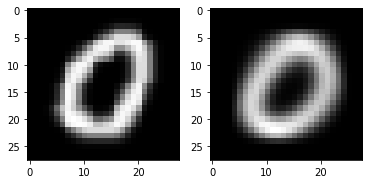

In [22]:
import matplotlib.pyplot as plt
plt.subplot(121)
plt.imshow(mstsml(chaO, opt_0)[0],cmap='gray')
plt.subplot(122)
plt.imshow(opt_0[0],cmap='gray')

## Correct 0 from 8

In [8]:
import os
import sys

script_path = os.path.dirname(os.path.abspath('__file__'))
sys.path.append(os.path.join(script_path))

save_path = os.path.join(script_path,'out','MNIST')

### Data & show omitted

In [133]:
transform=transforms.Compose([transforms.ToTensor()])
train_dataset = dsets.MNIST(root='./data',train=True, transform=transform,download=False)#first time download should be load.
test_dataset = dsets.MNIST(root='./data',train=False, transform=transform,download=False)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=len(train_dataset))
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=len(test_dataset))

In [ ]:
for a, b in train_loader:
  train_data = a
  train_label = b

for a, b in test_loader:
  test_data = a
  test_label = b

indices_0_8 = (train_label == 0) | (train_label == 8)
x_train_raw, y_train_s_raw = train_data[indices_0_8], train_label[indices_0_8]

indices_0_8 = (test_label == 0) | (test_label == 8)
x_test_raw, y_test_s_raw = test_data[indices_0_8], test_label[indices_0_8]

Learn from whole to get the optimal '0' surface

In [ ]:
'''
omit

sur_train_0 = x_train_raw[y_train_s_raw==0]
sur_test_0 = x_test_raw[y_test_s_raw==0]
sur_full_0 = torch.vstack((sur_train_0,sur_test_0)).cuda()
opt_0 = torch.mean(sur_full_0,axis=0)
opt_0 = opt_0.cpu()

ini_8 = x_train_raw[y_train_s_raw==8][0]

torch.save([opt_0, ini_8],save_path+'/opt_0_ini_8.pt')
'''

'''
'Under MNIST'
opt_0_alt = mstsml(chaO, opt_0)
opt_0_alt = opt_0_alt/torch.max(opt_0_alt)*torch.max(opt_0) #rescale
torch.save([opt_0, opt_0_alt, ini_8],save_path+'/opt_0_opt_0_alt_ini_8.pt')
'''

### Start from here

In [9]:
opt_0, opt_0_alt, ini_8 = torch.load(save_path+'/opt_0_opt_0_alt_ini_8.pt')

In [ ]:
'''
not necessary

sur_train_8 = x_train_raw[y_train_s_raw==8]#.cuda()
sur_test_8 = x_test_raw[y_test_s_raw==8]#.cuda()
sur_full_8 = torch.vstack((sur_train_8,sur_test_8)).cuda()
opt_8 = torch.mean(sur_full_8,axis=0)
opt_8 = opt_8.cpu()
'''

In [10]:
# Function for figure
def f_star_plt(X,Y):
    obj = torch.tensor(np.squeeze(opt_0, axis=None),dtype=None, device=None)
    Z = obj[X,Y] # here we need to change the type to ap.array
    return Z

In [11]:
# Function for figure
def f_star_alt_plt(X,Y):
    obj = torch.tensor(np.squeeze(opt_0_alt, axis=None),dtype=None, device=None)
    Z = obj[X,Y] # here we need to change the type to ap.array
    return Z

In [12]:
# Function for figure
def f_0_plt(X,Y):
    obj = torch.tensor(np.squeeze(ini_8, axis=None),dtype=None, device=None)
    Z = obj[X,Y] # here we need to change the type to ap.array
    return Z

C:\Users\zhangchen\AppData\Local\Temp\ipykernel_1428\440593827.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  obj = torch.tensor(np.squeeze(opt_0, axis=None),dtype=None, device=None)


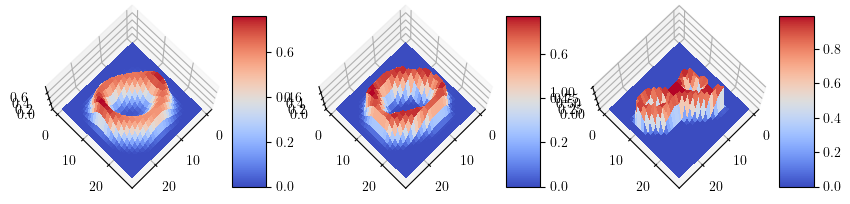

In [13]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig = plt.figure(figsize=(10,5))

# Make data.
X = np.arange(0, 28, 1)
Y = np.arange(0, 28, 1)
X, Y = np.meshgrid(X, Y)

# Plot the surface 0
Z = np.array(f_star_plt(X, Y))
ax = fig.add_subplot(1, 3, 1, projection='3d')
surf0 = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.view_init(75,45)
fig.colorbar(surf0, shrink=0.5, aspect=5) # Add a color bar which maps values to colors.

# Plot the surface 0 replacement
Z = np.array(f_star_alt_plt(X, Y))
ax = fig.add_subplot(1, 3, 2, projection='3d')
surf0_alt = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.view_init(75,45)
fig.colorbar(surf0_alt, shrink=0.5, aspect=5) # Add a color bar which maps values to colors.

# Plot the surface 8
Z = np.array(f_0_plt(X, Y))
ax = fig.add_subplot(1, 3, 3, projection='3d')
surf8 = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.view_init(75,45)
fig.colorbar(surf8, shrink=0.5, aspect=5)

plt.show()

## Train Model. Can read results directly

In [14]:
import time
eta = 0.01  # Learning rate.
num_iterations = 60000  # Iterations for gradient descent.
seed = 0  # Random seed.

# Seed for reproducibility.
np.random.seed(seed)

# Obtain pixels.
x1 = torch.arange(0, 28, 1)
x2 = torch.arange(0, 28, 1)
x1, x2 = torch.meshgrid(x1, x2)
pixels = torch.vstack((x1.flatten(),x2.flatten())).T.cuda()

D:\Anaconda\envs\mytorch\lib\site-packages\torch\functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


### Square loss $L[f]=(y_i-f(x_i))^2$  $DL[f]=-2(y_i-f(x_i))K(x_i, \cdot)$

In [15]:
# The kernel we use.
def rbf_kernel(x_1, x_2):
    '''
    x_1: [[13,15],[12,17]]
    x_2: [[10,16],[14,14],[11,13]]
    output: #row - #example
            #col - #list
        [[4.2484e-18, 3.3546e-04, 1.2664e-14],
        [2.0612e-09, 2.6103e-23, 2.9375e-30]]
    interleave: a,b,c -> a,a,b,b,c,c for cross norm
    reshape: split it to do block minus '-'
    '''
    big_x1 = torch.repeat_interleave(x_1,len(x_2),dim=0).reshape(len(x_1),len(x_2),2).cuda()
    #print(big_x1)
    #print(big_x1 - x_2)
    norm = torch.norm ((big_x1 - x_2).type(dtype), dim=2)
    #print(norm)
    return torch.exp(-(((norm) / 0.5) ** 2)).cuda()

In [16]:
def f_0(example):
    '''
    f_0: '8'
    obj: 28*28 initial figure random
    example: [[x,y],[x,y]]
    output: [label1,label2]
    '''
    obj = torch.tensor(np.squeeze(ini_8, axis=None),dtype=None, device=None)
    
    #one point or many point
    if len(example.shape) > 1:
        x, y = example[:,0], example[:,1]
    else:
        x, y = example[0], example[1]

    Z = obj[x,y] # here we need to change the type to ap.array
    return Z.cuda()

In [17]:
def f_star(example):
    '''
    f_star: '0'
    obj: 28*28 should be the best profile
    example: [[x,y],[x,y]]
    '''
    obj = torch.tensor(np.squeeze(opt_0, axis=None),dtype=None, device=None)
    
    #one point or many point
    if len(example.shape) > 1:
        x, y = example[:,0], example[:,1]
    else:
        x, y = example[0], example[1]
    
    Z = obj[x,y] # here we need to change the type to ap.array
    return Z.cuda()

In [18]:
def f_star_alt(example):
    '''
    f_star: '0' replacement
    obj: 28*28 should be the best profile
    example: [[x,y],[x,y]]
    '''
    obj = torch.tensor(np.squeeze(opt_0_alt, axis=None),dtype=None, device=None)
    
    #one point or many point
    if len(example.shape) > 1:
        x, y = example[:,0], example[:,1]
    else:
        x, y = example[0], example[1]
    
    Z = obj[x,y] # here we need to change the type to ap.array
    return Z.cuda()

In [19]:
def greedy_B(y_t, y_s, batch, pool=False, plScale= 0.5):
    '''
    it can be threshold if batch <=1
    y_t, y_s are [x1,x2,x3]
    output: index of top k in x_list corresponded to y_t
    '''
    dif = torch.abs(y_t-y_s)
    if pool:
        '''
        Keep original order
        '''
        np.random.seed(seed)
        k=np.random.choice(len(y_s), int(plScale*len(y_s)), replace=False) #without replacement
        #print(k[0:5])
        tem_dif = torch.zeros_like(dif)
        tem_dif[k] = dif[k]
        dif = tem_dif
    
    #one point or many point
    if batch > 1 or  batch == 1:
        _, ind = torch.topk(dif,batch)
    elif (batch>0 and batch<1) or  batch == -1:
          _, ind = torch.topk(dif,int(np.abs(batch)*len(dif)))
    else:
        print("Invalid batch!")
    
    return ind

In [20]:
def gradient(x, y, x_list, y_t, K): #add a argument "type" for specified loss
    '''
    batch gradient, not argmin
    If there are multiple minimal values then the indices of the first minimal value are returned.
    
    f_0: '8'
    obj: 28*28
    input x: [[x1,x2],[x1,x2]] int pixel point
    input y: [label1,label2]
    input x_list: [[x1,x2],[x1,x2],[x1,x2]]
    input y_t: [x1,x2,x3] corresponds to x_list
    output gradient: [x1,x2,x3] long, same order as x_list
    K: K(2*2,dim=3*2) output 2*3 2:two input centor, 3:three compute list(pixel)
    '''
    if len(x.shape) == 1:
        x = torch.unsqueeze(x, 0)
    # according to the rule of pixel layout and assume figure are square
    wid = np.sqrt(len(x_list))
    w = torch.tensor([wid,1], dtype=torch.float64).cuda()
    #print(w.dtype,x.dtype)
    ind = torch.matmul(x.type(torch.float64),w) #+1  no need to add 1 since the first one is indexed at 0
    ind = ind.type(torch.int64)
    f_x=y_t[ind]#same long as x
    
    #square_loss
    #print(torch.unsqueeze((y-f_x), 1))
    '''
    unsqueeze for eache example mul each corresponded K
    '''
    gradient = -2*torch.unsqueeze((y-f_x), 1)*K(x, x_list)
    
    '''
    mean->1*len(x_list)
    '''
    gradient = torch.mean(gradient,axis=0)
    print('gradient: ',torch.norm(gradient))
    return gradient.cuda()

### Training

In [18]:
clear_print
'''
Only change points corresponding to example provided
'''
training_start_time = time.time()
#records
f_t = []
loss_t = []
tm_t = []
y_0 = f_0(pixels)
f_t.append(y_0)
y_star = f_star(pixels)
loss_0 = torch.norm(y_0-y_star)/len(y_star)
loss_t.append(loss_0.cpu())
tm_t.append(0)

iter_count = 0
step = 0.05*num_iterations
while iter_count < num_iterations:
    '''
    if np.remainder(iter_count, step) == 0:
        sel_idx = greedy_B(f_t[-1], y_star, 1)
    
    for random selection, generate sel_idx by random, random seed can be set as iter_count
    '''
    
    sel_idx = greedy_B(f_t[-1], y_star, 1)#, pool=True, plScale= 0.8
    '''
    np.random.seed(iter_count)
    sel_idx = np.random.randint(0,len(y_star),int(0.05*len(y_star)))
    '''
    
    '''
    example: [[x1,x2],[x1,x2]] int pixel point
    '''
    example = pixels[sel_idx]#torch.tensor([14,14])
    '''
    intorduce replacement
    '''
    #label = f_star(example)
    np.random.seed(iter_count)
    label = np.random.choice([f_star(example).cpu(), f_star_alt(example).cpu()], 1, p=[0.8, 0.2])[0].cuda()
   
    '''
    torch.Size([784]) - torch.Size([784])
    '''
    f_t.append((f_t[-1] -eta*gradient(example, label, pixels, f_t[-1], rbf_kernel)))
    loss_t.append((torch.norm(f_t[-1]-y_star)/len(y_star)).cpu())
    tm_t.append(time.time() - training_start_time)
    iter_count += 1
    print(iter_count,'-th loss: ',loss_t[-1])
    print('Training finished, took {:.2f}s'.format(tm_t[-1]))

NameError: name 'clear_print' is not defined

In [55]:
#torch.save([f_t, loss_t, tm_t],save_path+'/8-0 eta=0.01 S=0.05.pt')
#torch.save([f_t, loss_t, tm_t],save_path+'/8-0 eta=0.01 B=0.05.pt')
#torch.save([f_t, loss_t, tm_t],save_path+'/8-0 eta=0.01 B=0.5.pt')
#torch.save([f_t, loss_t, tm_t],save_path+'/8-0 eta=0.01 B=1.pt')
#torch.save([f_t, loss_t, tm_t],save_path+'/8-0 eta=0.01 B=one.pt')
#torch.save([f_t, loss_t, tm_t],save_path+'/8-0 eta=0.01 B=one P=0.8.pt')
torch.save([f_t, loss_t, tm_t],save_path+'/8-0 eta=0.01 B=one alt.pt')

### Convergence performance. Read here

In [ ]:
'''
add 'a' front for differing from cheetah codes
'''
af_t_0_05, aloss_t_0_05, atm_0_05 = torch.load(save_path+'/8-0 eta=0.01 B=0.05.pt')
af_t_0_5, aloss_t_0_5, atm_0_5 = torch.load(save_path+'/8-0 eta=0.01 B=0.5.pt')
af_t_0_05_S, aloss_t_0_05_S, atm_0_05_S = torch.load(save_path+'/8-0 eta=0.01 S=0.05.pt')
af_t_1, aloss_t_1, atm_1 = torch.load(save_path+'/8-0 eta=0.01 B=1.pt')
af_t_o, aloss_t_o, atm_o = torch.load(save_path+'/8-0 eta=0.01 B=one.pt')
af_t_o_p, aloss_t_o_p, atm_o_p = torch.load(save_path+'/8-0 eta=0.01 B=one P=0.8.pt')
af_t_o_alt, aloss_t_o_alt, atm_o_alt = torch.load(save_path+'/8-0 eta=0.01 B=one alt.pt')

In [9]:
'''
add 'a' front for differing from cheetah codes
'''
_, aloss_t_0_05, _ = torch.load(save_path+'/8-0 eta=0.01 B=0.05.pt')
_, aloss_t_0_5, _ = torch.load(save_path+'/8-0 eta=0.01 B=0.5.pt')
_, aloss_t_0_05_S, _ = torch.load(save_path+'/8-0 eta=0.01 S=0.05.pt')
_, aloss_t_1, _ = torch.load(save_path+'/8-0 eta=0.01 B=1.pt')
_, aloss_t_o, _ = torch.load(save_path+'/8-0 eta=0.01 B=one.pt')
_, aloss_t_o_p, _ = torch.load(save_path+'/8-0 eta=0.01 B=one P=0.8.pt')
_, aloss_t_o_alt, _ = torch.load(save_path+'/8-0 eta=0.01 B=one alt.pt')

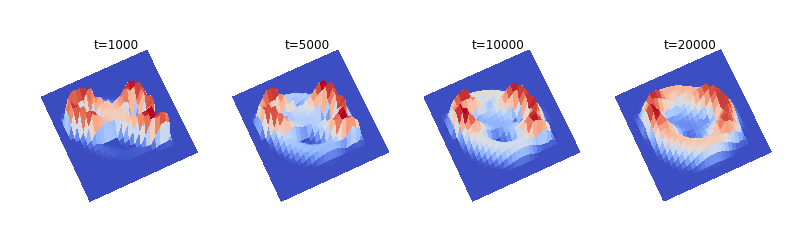

In [57]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

#from mpl_toolkits.mplot3d import axes3d

fig = plt.figure(figsize=(16,4))

# Make data. Draw 0
X = np.arange(0, 28, 1)
Y = np.arange(0, 28, 1)
X, Y = np.meshgrid(X, Y)

ite_list = [1000, 5000, 10000,20000]#[5000, 10000,20000, 40000]##[10000, 20000,40000, 60000]#[1000, 5000, 10000,20000]
for i in ite_list:
    j = ite_list.index(i)
    def f_t_plt(X,Y):
        '''
        change here
        '''
        obj = af_t_o_alt[i].cpu().numpy().reshape(28,28)
        Z = obj[X,Y] # here we need to change the type to ap.array
        return Z

    Z = np.array(f_t_plt(X, Y)) # here we need to change the type to ap.array

    # Plot the surface.
    ax = fig.add_subplot(1, len(ite_list), j+1, projection='3d')
    
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)

    # Customize the z axis.
    #ax.set_zlim(-1.01, 1.01)
    #ax.zaxis.set_major_locator(LinearLocator(10))
    # A StrMethodFormatter is used automatically
    #ax.zaxis.set_major_formatter('{x:.02f}')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_axis_off()
    # Add a color bar which maps values to colors.
    #fig.colorbar(surf, shrink=0.22, aspect=5)

    ax.view_init(75,65)
    plt.title('t={}'.format(i),y=0.9, loc='center',horizontalalignment='center', verticalalignment='top')
tight_coe = -0.4
fig.subplots_adjust(wspace=tight_coe, hspace=tight_coe)
plt.show()
fig.savefig(save_path+'/8-0 eta=0.01 B=one alt.pdf'.format(1,2),bbox_inches='tight', pad_inches = -0.3)

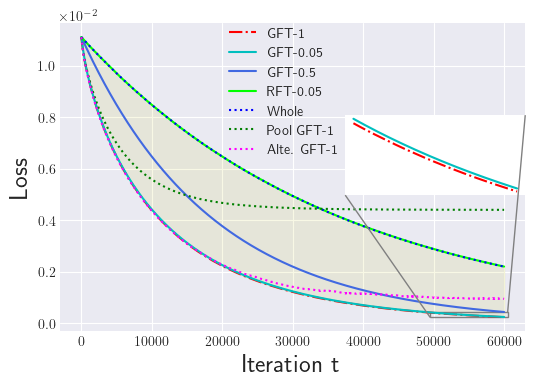

In [12]:
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

plt.style.use('seaborn-v0_8-darkgrid')   #grey background, white line style

sf = plt.figure(figsize=(6,4))
ax = sf.add_subplot()
plt.plot(aloss_t_o,color='red',linestyle='-.',label='GFT-1')
plt.plot(aloss_t_0_05,color='c',label='GFT-0.05')
plt.plot(aloss_t_0_5,color='royalblue',label='GFT-0.5')
plt.plot(aloss_t_0_05_S,color='lime',label='RFT-0.05')
plt.plot(aloss_t_1,color='b',linestyle=':',label='Whole')
plt.plot(aloss_t_o_p,color='g',linestyle=':',label='Pool GFT-1')
plt.plot(aloss_t_o_alt,color='magenta',linestyle=':',label='Alte. GFT-1')

plt.fill_between(range(len(aloss_t_o)), aloss_t_o,aloss_t_1,color='y', alpha=0.1)

plt.ticklabel_format(style='sci', scilimits=(-2,-1), axis='y')
plt.tick_params(axis='both', which='major', top='on', right='on', direction='in')
plt.legend(loc=[0.35,0.55], prop={'size': 10})
#plt.xlim(-0.5,600)
plt.xlabel('Iteration t', fontsize=18)
plt.ylabel('Loss', fontsize=18)

#-----------------zoom
xlim_1, xlim_2 = 50000,60000
ax_zoom = sf.add_axes([0.6, 0.45, 0.3, 0.2], facecolor='white')
plt.plot(np.arange(xlim_1, xlim_2,1),aloss_t_o[xlim_1:xlim_2],color='red',linestyle='-.')#,label='AFT-1'
plt.plot(np.arange(xlim_1, xlim_2,1),aloss_t_0_05[xlim_1:xlim_2],color='c')#,label='AFT-0.05'

mark_inset(ax, ax_zoom, loc1=1, loc2=3, fc="none", ec="0.5")

ax_zoom.set( xticks=[], yticks=[])


plt.show()
sf.savefig(save_path+'/Loss.pdf',bbox_inches='tight')

## Impart cheetah

In [2]:
import torch
import numpy as np

In [3]:
print('GPU: ',torch.cuda.is_available())
dtype = torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

GPU:  True


In [4]:
# check if CUDA is available
train_on_gpu = torch.cuda.is_available()
if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


In [5]:
import os
import sys

In [7]:
script_path = os.path.dirname(os.path.abspath('__file__'))
sys.path.append(os.path.join(script_path))

In [8]:
data_path = os.path.join(script_path,'data','matching','cheetah.jpg')
save_path = os.path.join(script_path,'out','matching')

In [ ]:
'''

import time
#import pickle
'''

### Omitted read results directly

In [11]:
im_size = 100

from PIL import Image
# load and resize image
img = Image.open(data_path)
img.thumbnail((im_size,im_size), Image.ANTIALIAS)  # resizes image in-place
# imgplot = plt.imshow(img)

pix = torch.from_numpy(np.array(img))
min_side = np.min(pix[:, :, 0].shape) # 100 VS 92 compare two number, np is OK
pix = 255 - pix[0:min_side, 0:min_side]

C:\Users\zhangchen\AppData\Local\Temp\ipykernel_26744\1769279123.py:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img.thumbnail((im_size,im_size), Image.ANTIALIAS)  # resizes image in-place


In [59]:
opt_cheetah = pix.type(torch.float64)
opt_cheetah = torch.unsqueeze(opt_cheetah[:,:,0], 0)

import torchvision.transforms as transforms
transform = transforms.Compose([ transforms.Normalize(torch.mean(opt_cheetah),torch.std(opt_cheetah))])
opt_cheetah = transform(opt_cheetah)

opt_cheetah = torch.squeeze(opt_cheetah)

In [60]:
ini_cheetah = torch.zeros_like(opt_cheetah)

torch.Size([92, 92])


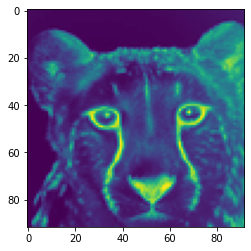

In [61]:
import matplotlib.pyplot as plt
plt.imshow(opt_cheetah)
print(opt_cheetah.shape)

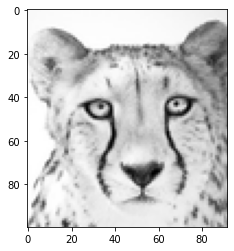

In [62]:
imgplot = plt.imshow(img)
#plt.savefig(os.path.join(save_path,'original.png'))

## Train Model

In [63]:
import time
eta = 0.01  # Learning rate.
num_iterations = 60000  # Iterations for gradient descent.
seed = 0  # Random seed.

# Seed for reproducibility.
np.random.seed(seed)

# Obtain pixels.
x1 = torch.arange(0, min_side, 1)
x2 = torch.arange(0, min_side, 1)
x1, x2 = torch.meshgrid(x1, x2)
pixels = torch.vstack((x1.flatten(),x2.flatten())).T.cuda()

### Square loss $L[f]=(y_i-f(x_i))^2$  $DL[f]=-2(y_i-f(x_i))K(x_i, \cdot)$

In [64]:
# The kernel we use.
def rbf_kernel(x_1, x_2):
    '''
    x_1: [[13,15],[12,17]]
    x_2: [[10,16],[14,14],[11,13]]
    output: #row - #example
            #col - #list
        [[4.2484e-18, 3.3546e-04, 1.2664e-14],
        [2.0612e-09, 2.6103e-23, 2.9375e-30]]
    interleave: a,b,c -> a,a,b,b,c,c for cross norm
    reshape: split it to do block minus '-'
    '''
    big_x1 = torch.repeat_interleave(x_1,len(x_2),dim=0).reshape(len(x_1),len(x_2),2).cuda()
    #print(big_x1)
    #print(big_x1 - x_2)
    norm = torch.norm ((big_x1 - x_2).type(dtype), dim=2)
    #print(norm)
    return torch.exp(-(((norm) / 0.5) ** 2)).cuda()

In [65]:
def f_0(example):
    '''
    f_0: '8'
    obj: 28*28 initial figure random
    example: [[x,y],[x,y]]
    output: [label1,label2]
    '''
    obj = ini_cheetah #torch.tensor(np.squeeze(x_train_raw[y_train_s_raw==8][0], axis=None),dtype=None, device=None)
    
    #one point or many point
    if len(example.shape) > 1:
        x, y = example[:,0], example[:,1]
    else:
        x, y = example[0], example[1]

    Z = obj[x,y]#.type(torch.float64) # here we need to change the type to ap.array
    return Z.cuda()

In [66]:
def f_star(example):
    '''
    f_star: '0'
    obj: min_side*min_side should be the best profile
    example: [[x,y],[x,y]]
    '''
    obj = opt_cheetah #torch.tensor(np.squeeze(x_train_raw[y_train_s_raw==0][0], axis=None),dtype=None, device=None)
    
    #one point or many point
    if len(example.shape) > 1:
        x, y = example[:,0], example[:,1]
    else:
        x, y = example[0], example[1]
    
    Z = obj[x,y]#.type(torch.float64) # here we need to change the type to ap.array
    return Z.cuda()

In [67]:
def greedy_B(y_t, y_s, batch, pool=False, plScale= 0.5):
    '''
    it can be threshold if batch <=1
    y_t, y_s are [x1,x2,x3]
    output: index of top k in x_list corresponded to y_t
    '''
    dif = torch.abs(y_t-y_s)
    if pool:
        '''
        Keep original order
        '''
        np.random.seed(seed)
        k=np.random.choice(len(y_s), int(plScale*len(y_s)), replace=False) #without replacement
        #print(k[0:5])
        tem_dif = torch.zeros_like(dif)
        tem_dif[k] = dif[k]
        dif = tem_dif
    
    #one point or many point
    if batch > 1 or  batch == 1:
        _, ind = torch.topk(dif,batch)
    elif (batch>0 and batch<1) or  batch == -1:
          _, ind = torch.topk(dif,int(np.abs(batch)*len(dif)))
    else:
        print("Invalid batch!")
    
    return ind

In [68]:
def gradient(x, y, x_list, y_t, K): #add a argument "type" for specified loss
    '''
    batch gradient, not argmin
    If there are multiple minimal values then the indices of the first minimal value are returned.
    
    f_0: '8'
    obj: 28*28
    input x: [[x1,x2],[x1,x2]] int pixel point
    input y: [label1,label2]
    input x_list: [[x1,x2],[x1,x2],[x1,x2]]
    input y_t: [x1,x2,x3] corresponds to x_list
    output gradient: [x1,x2,x3] long as x_list
    K: K(2*2,dim=3*2) output 2*3 2:two input centor, 3:three compute list(pixel)
    '''
    if len(x.shape) == 1:
        x = torch.unsqueeze(x, 0)
    # according to the rule of pixel layout and assume figure are square
    wid = np.sqrt(len(x_list))
    w = torch.tensor([wid,1], dtype=torch.float64).cuda()
    #print(w.dtype,x.dtype)
    ind = torch.matmul(x.type(torch.float64),w) #+1  no need to add 1 since the first one is indexed at 0
    ind = ind.type(torch.int64)
    f_x=y_t[ind]#same long as x
    
    #square_loss
    #print(torch.unsqueeze((y-f_x), 1))
    '''
    unsqueeze for eache example mul each corresponded K
    '''
    gradient = -2*torch.unsqueeze((y-f_x), 1)*K(x, x_list)
    
    '''
    mean->1*len(x_list)
    '''
    gradient = torch.mean(gradient,axis=0)
    print('gradient: ',torch.norm(gradient))
    return gradient.cuda()

### Training

In [79]:
clear_print
'''
Only change points corresponding to example provided
'''
training_start_time = time.time()
#records
f_t = []
loss_t = []
tm_t = []
y_0 = f_0(pixels)
f_t.append(y_0.cpu())### to cpu
y_star = f_star(pixels)
loss_0 = torch.norm(y_0-y_star)/len(y_star)
loss_t.append(loss_0.item())
tm_t.append(0)

iter_count = 0
step = 0.05*num_iterations
while iter_count < num_iterations:
    '''
    if np.remainder(iter_count, step) == 0:
        sel_idx = greedy_B(f_t[-1], y_star, 1)
    
    for random selection, generate sel_idx by random, random seed can be set as iter_count
    '''
    
    sel_idx = greedy_B(f_t[-1].cuda(), y_star, 1, pool=True, plScale= 0.8)### to cuda  , pool=True, plScale= 0.8)
    '''
    np.random.seed(iter_count)
    sel_idx = np.random.randint(0,len(y_star),int(0.05*len(y_star)))
    '''
    
    '''
    example: [[x1,x2],[x1,x2]] int pixel point
    '''
    example = pixels[sel_idx]#torch.tensor([14,14])
    label = f_star(example)
    
    '''
    torch.Size([98*98]) - torch.Size([98*98])
    '''
    '''
    test memory
    r = torch.cuda.memory_reserved(0)
    print(iter_count,'before update ',r/1024/1024/1024)
    '''
    with torch.no_grad():
        f_t_temp = f_t[-1].cuda() -eta*gradient(example, label, pixels, f_t[-1].cuda(), rbf_kernel)
        loss_t_temp = torch.norm(f_t[-1].cuda()-y_star)/len(y_star)
    
    f_t.append(f_t_temp.cpu())
    loss_t.append(loss_t_temp.item())
    tm_t.append(time.time() - training_start_time)

    del f_t_temp,loss_t_temp,sel_idx, example, label
    torch.cuda.empty_cache()
    '''
    test memory
    r = torch.cuda.memory_reserved(0)
    print(sys.getsizeof(f_t[-1].storage())/1024/1024/1024)
    print('after update ',r/1024/1024/1024)
    '''
    iter_count += 1
    print(iter_count,'-th loss: ',loss_t[-1])
    print('Training finished, took {:.2f}s'.format(tm_t[-1]))

NameError: name 'clear_print' is not defined

In [78]:
#torch.save([f_t, loss_t, tm_t],save_path+'/2d cheetah eta=0.01 B=0.05.pt')
#torch.save([f_t, loss_t, tm_t],save_path+'/2d cheetah eta=0.01 B=0.5.pt')
#torch.save([f_t, loss_t, tm_t],save_path+'/2d cheetah eta=0.01 B=1.pt')
#torch.save([f_t, loss_t, tm_t],save_path+'/2d cheetah eta=0.01 S=0.05.pt')
#torch.save([f_t, loss_t, tm_t],save_path+'/2d cheetah eta=0.01 B=one.pt')
torch.save([f_t, loss_t, tm_t],save_path+'/2d cheetah eta=0.01 B=one P=0.8.pt')

### Convergence performance read here

In [7]:
f_t_0_05, loss_t_0_05, tm_0_05 = torch.load(save_path+'/2d cheetah eta=0.01 B=0.05.pt')#,map_location=torch.device('cpu')

In [8]:
f_t_0_5, loss_t_0_5, tm_0_5 = torch.load(save_path+'/2d cheetah eta=0.01 B=0.5.pt')

In [9]:
f_t_0_05_S, loss_t_0_05_S, tm_0_05_S = torch.load(save_path+'/2d cheetah eta=0.01 S=0.05.pt')

In [22]:
f_t_1, loss_t_1, tm_1 = torch.load(save_path+'/2d cheetah eta=0.01 B=1.pt')

In [20]:
f_t_o, loss_t_o, tm_o = torch.load(save_path+'/2d cheetah eta=0.01 B=one.pt')

In [9]:
f_t_o_p, loss_t_o_p, tm_o_p = torch.load(save_path+'/2d cheetah eta=0.01 B=one P=0.8.pt')

------------------

In [9]:
_, loss_t_0_05, _ = torch.load(save_path+'/2d cheetah eta=0.01 B=0.05.pt')#,map_location=torch.device('cpu')
_, loss_t_0_5, _ = torch.load(save_path+'/2d cheetah eta=0.01 B=0.5.pt')
_, loss_t_0_05_S, _ = torch.load(save_path+'/2d cheetah eta=0.01 S=0.05.pt')
_, loss_t_1, _ = torch.load(save_path+'/2d cheetah eta=0.01 B=1.pt')
_, loss_t_o, _ = torch.load(save_path+'/2d cheetah eta=0.01 B=one.pt')
_, loss_t_o_p, _ = torch.load(save_path+'/2d cheetah eta=0.01 B=one P=0.8.pt')

### Convergence performance

In [9]:
f_t_0_05, _, _ = torch.load(save_path+'/2d cheetah eta=0.01 B=0.05.pt')#,map_location=torch.device('cpu')

In [12]:
f_t_0_5, _, _= torch.load(save_path+'/2d cheetah eta=0.01 B=0.5.pt')

In [14]:
f_t_0_05_S, _, _ = torch.load(save_path+'/2d cheetah eta=0.01 S=0.05.pt')

In [16]:
f_t_1,_, _ = torch.load(save_path+'/2d cheetah eta=0.01 B=1.pt')

In [19]:
del f_t_0_05, f_t_0_5, f_t_0_05_S, f_t_1

In [9]:
f_t_o, _, _ = torch.load(save_path+'/2d cheetah eta=0.01 B=one.pt')

In [22]:
f_t_o_p,_, _ = torch.load(save_path+'/2d cheetah eta=0.01 B=one P=0.8.pt')

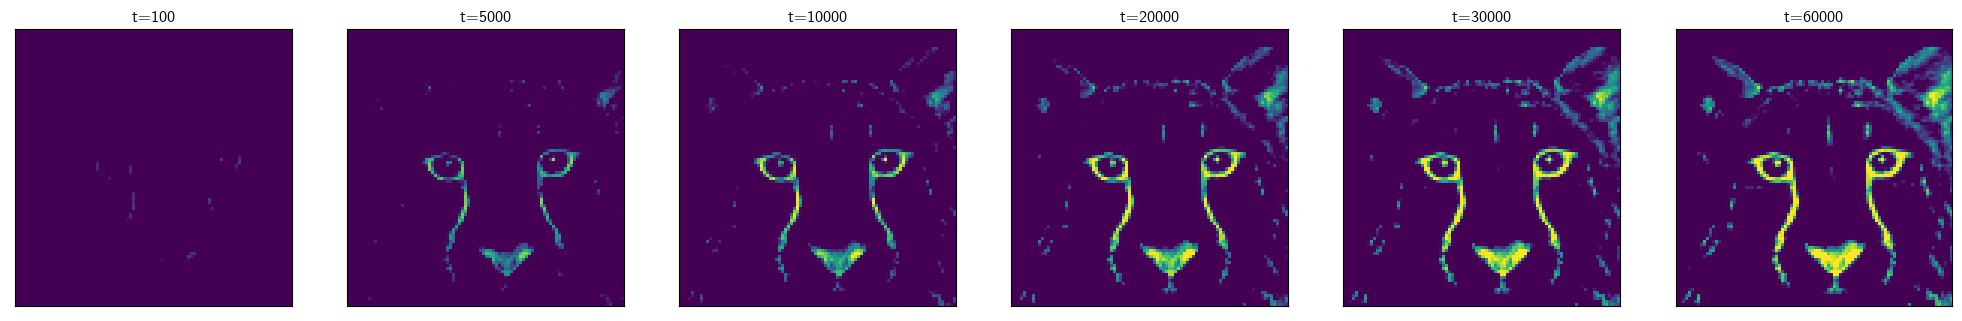

In [13]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib

norm = matplotlib.colors.Normalize(vmin=0, vmax=2)

#from mpl_toolkits.mplot3d import axes3d

fig = plt.figure(figsize=(25,4))

# Make data. Draw 0
X = np.arange(0, min_side, 1)
Y = np.arange(0, min_side, 1)
X, Y = np.meshgrid(X, Y)

ite_list = [100,5000, 10000, 20000, 30000,60000] #[0,50,150,250,350, 550]



for i in ite_list:
    j = ite_list.index(i)

    Z = f_t_o[i].reshape(min_side,min_side)#np.array(f_t_plt(X, Y)) # here we need to change the type to ap.array

    # Plot the surface.
    ax = fig.add_subplot(1, len(ite_list), j+1)
    
    #surf = ax.contourf(X, -Y, Z, norm = norm, antialiased=False)
    
    ax.imshow(Z,norm = norm)

    # Customize the z axis.
    #ax.set_zlim(-1.01, 1.01)
    #ax.zaxis.set_major_locator(LinearLocator(10))
    # A StrMethodFormatter is used automatically
    #ax.zaxis.set_major_formatter('{x:.02f}')
    ax.set_xticks([])
    ax.set_yticks([])
    #ax.set_zticks([])
    # Add a color bar which maps values to colors.

    #ax.view_init(90,0)
    
    plt.title('t={}'.format(i))
#fig.colorbar(surf, shrink=0.22, aspect=5)

plt.show()
#fig.savefig(save_path+'/2d cheetah eta=0.01 B=one P=0.8 show.pdf'.format(1,2),bbox_inches='tight')

In [16]:
torch.max(f_t_o[60000])

tensor(2.8564, dtype=torch.float64)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib

norm = matplotlib.colors.Normalize(vmin=0, vmax=1)

#from mpl_toolkits.mplot3d import axes3d

fig = plt.figure(figsize=(25,4))

# Make data. Draw 0
X = np.arange(0, min_side, 1)
Y = np.arange(0, min_side, 1)
X, Y = np.meshgrid(X, Y)

ite_list = [100,5000, 10000, 20000, 30000,45000]



for i in ite_list:
    j = ite_list.index(i)
    def f_t_plt(X,Y):
        '''
        change here
        '''
        obj = f_t[i].cpu().numpy().reshape(min_side,min_side)
        Z = obj[X,Y] # here we need to change the type to ap.array
        return Z

    Z = np.array(f_t_plt(X, Y)) # here we need to change the type to ap.array

    # Plot the surface.
    ax = fig.add_subplot(1, len(ite_list), j+1, projection='3d')
    
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False,norm = norm)

    # Customize the z axis.
    #ax.set_zlim(-1.01, 1.01)
    #ax.zaxis.set_major_locator(LinearLocator(10))
    # A StrMethodFormatter is used automatically
    #ax.zaxis.set_major_formatter('{x:.02f}')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    # Add a color bar which maps values to colors.

    ax.view_init(90,0)
    
    plt.title('t={}'.format(i))
#fig.colorbar(surf, shrink=0.22, aspect=5)

plt.show()
fig.savefig(save_path+'/3d cheetah eta=0.01 B=0.05.pdf'.format(1,2),bbox_inches='tight')

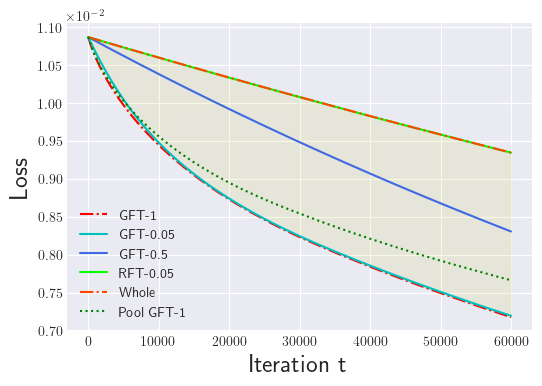

In [11]:
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

plt.style.use('seaborn-v0_8-darkgrid')   #grey background, white line style

import matplotlib.pyplot as plt
sf = plt.figure(figsize=(6,4))
plt.plot(loss_t_o,color='red',linestyle='-.',label='GFT-1')
plt.plot(loss_t_0_05,color='c',label='GFT-0.05')
plt.plot(loss_t_0_5,color='royalblue',label='GFT-0.5')
plt.plot(loss_t_0_05_S,color='lime',label='RFT-0.05')
plt.plot(loss_t_1,color='orangered',linestyle='-.',label='Whole')
plt.plot(loss_t_o_p,color='g',linestyle=':',label='Pool GFT-1')

plt.fill_between(range(len(loss_t_o)), loss_t_o,loss_t_1,color='y', alpha=0.1)
plt.tick_params(axis='both', which='major', top='on', right='on', direction='in')
plt.ticklabel_format(style='sci', scilimits=(-3,-2), axis='y')
plt.legend()
#plt.xlim(-0.5,600)
plt.xlabel('Iteration t', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.show()
sf.savefig(save_path+'/Loss.pdf',bbox_inches='tight')